# Practical Machine Learning 
### Project: Model Selection

# Abstract

# Part 1: Business and Data Understanding

### Q. Identify a suitable dataset for your canditate question(s)

Go have a look at any of these websites:

* https://www.kaggle.com/datasets 
* https://datasetsearch.research.google.com/
* https://data.gov.uk/

Find an interesting looking data set related to your problem domain and get a copy of it


In [1]:

!pip install azureml-core
!pip install azureml-dataprep

In [2]:
import pandas as pd # data processing
import numpy as np # maths
# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
# ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib
from scipy.stats import zscore

# read data and .head()
# ASSUME- data.csv from BCA (cancer analysis)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# azureml-core of version 1.0.72 or higher is required
# azureml-dataprep[pandas] of version 1.1.34 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '4d82b630-5b80-4e5f-8acf-a1cfffeb47f7'
resource_group = 'ML'
workspace_name = 'mach1'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='Sleep')
data = dataset.to_pandas_dataframe()

In [4]:
rndata = data.rename(columns = {'sr':'snoring rate', 'rr':'respiration rate',
                        't':'body temperature', 'lm':'limb movement', 
                        'bo':'blood oxygen', 'rem':'eye movement', 
                        'sr.1':'sleeping hours','hr':'heart rate', 
                        'sl':'stress level'})
rndata.head()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sr_1,heart rate,stress level
0,93.80,25.68,91.84,16.60,89.84,99.60,1.84,74.20,3
1,91.64,25.10,91.55,15.88,89.55,98.88,1.55,72.76,3
2,60.00,20.00,96.00,10.00,95.00,85.00,7.00,60.00,1
3,85.76,23.54,90.77,13.92,88.77,96.92,0.77,68.84,3
4,48.12,17.25,97.87,6.50,96.25,72.48,8.25,53.12,0


### Q. Define the problem domain

In [5]:
# Smart-Yoga Pillow (SaYoPillow) is proposed to help in understanding the relationship between stress and sleep and to fully materialize the idea of “Smart-Sleeping” by proposing an edge device. 

# Detecting stress levels -> Relationship to sleep


# ENGLISH not Python
# Diagnosis is an ideal label column because it is the result
# useful for a doctor to speed up the diagnosis process. 

### Q. Identify candidate questions for your machine learning project

In [6]:
# value_counts
# discrete or continuous numbers
# what is label, what columns should be evaluated to become 
# features, Dimensions, Variables
# 
# can i use the dataset as-is or does it need cleaning?

# rndata.info()
#0: 'low/normal', 1: 'medium low', 2: 'medium', 3: 'medium high', 4: 'high'})
rndata['stress level'].value_counts()

4    126
3    126
2    126
1    126
0    126
Name: stress level, dtype: int64

### Q. Generate a descriptive statistics report for the columns in your dataset

In [7]:
# data.describe().T

rndata.describe().T

,count,mean,std,min,25%,50%,75%,max
snoring rate,630.00,71.60,19.37,45.00,52.50,70.00,91.25,100.00
respiration rate,630.00,21.80,3.97,16.00,18.50,21.00,25.00,30.00
body temperature,630.00,92.80,3.53,85.00,90.50,93.00,95.50,99.00
limb movement,630.00,11.70,4.30,4.00,8.50,11.00,15.75,19.00
blood oxygen,630.00,90.90,3.90,82.00,88.50,91.00,94.25,97.00
eye movement,630.00,88.50,11.89,60.00,81.25,90.00,98.75,105.00
sr_1,630.00,3.70,3.05,0.00,0.50,3.50,6.50,9.00
heart rate,630.00,64.50,9.92,50.00,56.25,62.50,72.50,85.00
stress level,630.00,2.00,1.42,0.00,1.00,2.00,3.00,4.00


# Part 2: Data Preparation

### Q. Discuss the following types of missing data and how they would be handled in reference to your dataset where applicable.
*	Missing completely at random (MCAR)
*	Missing at random (MAR)
*	Missing Not at Random (MNAR)

In [62]:
rndata.info()
#Dataset was complete with no missing values.
#If values were missing could drop rows/columns or fill using mean()/median()/mode()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring rate      630 non-null    float64
 1   body temperature  630 non-null    float64
 2   limb movement     630 non-null    float64
 3   eye movement      630 non-null    float64
 4   sr_1              630 non-null    float64
 5   heart rate        630 non-null    float64
 6   stress level      630 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 34.6 KB


Q. Is there any correlation in the data? How would you decide which columns to keep?

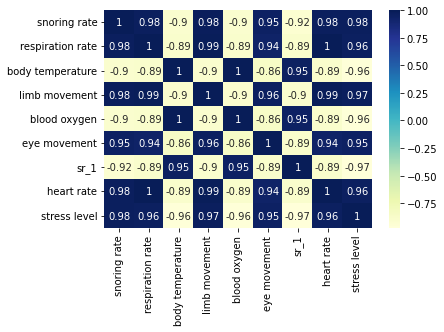

In [9]:
# sns.heatmap(rndata)
dataplot = sns.heatmap(rndata.corr(), cmap="YlGnBu", annot=True)
# SEABORN and data.corr() to plot a heatmap
# Github-> DFE6


In [10]:
rndata.drop(['respiration rate', 'blood oxygen'], axis=1, inplace=True)

In [11]:
rndata.head()

,snoring rate,body temperature,limb movement,eye movement,sr_1,heart rate,stress level
0,93.80,91.84,16.60,99.60,1.84,74.20,3
1,91.64,91.55,15.88,98.88,1.55,72.76,3
2,60.00,96.00,10.00,85.00,7.00,60.00,1
3,85.76,90.77,13.92,96.92,0.77,68.84,3
4,48.12,97.87,6.50,72.48,8.25,53.12,0


Q. Is there any imbalance in the label
?

In [12]:
# LABEL COLUMN-> Y/value you want to predict
# diagnosis column from bca

# Cat = 100, Parrot= 50, Ant= 5
# either no action action required or just del extra rows!

# if one class is less than quarter of the other class,
# the data is imbalanced!
#
# Regression- NO ACTION REQUIRED. 
# Classification (LABEL/Y) - Diagnosis
# 1) Del some of the rows of the larger dataset 
# 2) OR generate FAKE/SIMULATED data 
# 3) Ignore if you want to take a leap of faith in the model

rndata['stress level'].value_counts()

4    126
3    126
2    126
1    126
0    126
Name: stress level, dtype: int64

Q. Are there any outliers in the dataset? What do you do with them?

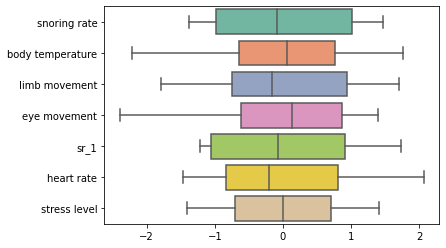

In [13]:
# OPTIONAL
# Z-Score
# check for values >3 and <-3
# What do i do with them?
# 1) Remove them 
# 2) replace all >3 with max, <-3 with min
# 3) Ignore
zdata = rndata.apply(zscore)
ax = sns.boxplot(data=zdata, orient="h", palette="Set2")
# Detecting Frauds, Anomalies 

Q. Are there any strings in the features that need to be converted to integers? Do you select One-Hot encoding or Label Encoding?

In [14]:
# if you are not sure, do label ENCODING
# unique_values = data['diagnosis'].value_counts()
# Form a dictionary of the unique values!
# encoding_funk = lambda x : dictionary[x]
# data['my_string_column'] = data['my_string_column'].apply(encoding_funk)

In [15]:
#Had the choice to use words however decided to keep to numerical values for ML purposes.
# rndata['stress level'] = rndata['stress level'].replace({0:'low/normal',1:'medium low' , 2: 'medium', 3:'medium high', 4:'high'})

Q. Split the data for TRAINING and SCORING (testing). OPTIONAL: Discuss what problems could happen we have poor distribution b/w training and testing?

In [48]:
# from sklearn.model_selection import train_test_split
# xtrain,xtest,ytrain,ytest = train_test_split(x, y,
#                             test_size=0.2, random_state=42)
y = rndata['stress level']
x = rndata.drop('stress level', axis = 1)

xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.5, random_state=42)
print(y.shape)
print(x.shape)

(630,)
(630, 6)


# Part 3: Model Selection

### Q. Use the cheat sheet below to choose the algorithm/estimator suitable for building a model to address your candidate question(s)

* https://scikit-learn.org/stable/tutorial/machine_learning_map/

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [56]:
for algo in [RandomForestClassifier(), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearSVC(), XGBClassifier(), LGBMClassifier()]:
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  print(accuracy_score(ytest, predictions))
  # print(f1_score(ytest, predictions))
  print('***')

0.9873015873015873
***
1.0
***
0.9936507936507937
***
1.0
***
0.8984126984126984
***
0.9841269841269841
***
0.9873015873015873
***


# Part 4: Model Evaluation

### Q. Identify which of the statistical measures below are suitable for the evaluation of your model.

Classification Metrics:
* Accuracy
* Precision
* Recall
* F1 Score

Regression Metrics:
    
* Mean absolute error (MAE)
* Root mean squared error (RMSE)
* Relative absolute error (RAE)
* Relative squared error (RSE)
* Mean Zero One Error (MZOE)
* Coefficient of determination

 

In [57]:
for algo in [RandomForestClassifier(), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), LinearSVC(), XGBClassifier(), LGBMClassifier()]:
  model = algo
  model.fit(xtrain, ytrain)
  predictions = model.predict(xtest)
  print(accuracy_score(ytest, predictions))
  # print(f1_score(ytest, predictions))
  print('***')

0.9904761904761905
***
1.0
***
0.9873015873015873
***
1.0
***
0.7968253968253968
***
0.9841269841269841
***
0.9873015873015873
***


# Part 5: Stretch - Model Deployment

### Q. Evaluate the open-source app framework for Machine Learning model deployment below in your own time.

* https://streamlit.io/

In [ ]:
# EXPORT your model and upload to azure
# deploy to Azure Container Instance
# after 20-30 mins, consume tab will appear in your ENDPOINT
# and then paste the PYTHON code below!

In [58]:
joblib.dump(GaussianNB(), 'my_model.pkl', compress=9)

['my_model.pkl']

In [61]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))


The scikit-learn version is 0.23.1.


In [63]:
import urllib.request
import json
import os
import ssl

def allowSelfSignedHttps(allowed):
    # bypass the server certificate verification on client side
    if allowed and not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None):
        ssl._create_default_https_context = ssl._create_unverified_context

allowSelfSignedHttps(True) # this line is needed if you use self-signed certificate in your scoring service.

# Request data goes here
data = {
}

body = str.encode(json.dumps(data))

url = 'http://556aed82-7bd6-4e78-993c-a7b2ade33bc0.eastus.azurecontainer.io/score'
api_key = '' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    print(result)
except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(error.read().decode("utf8", 'ignore'))

The request failed with status code: 400
Content-Length: 66
Content-Type: application/json
Date: Thu, 17 Mar 2022 15:00:03 GMT
Server: nginx/1.14.0 (Ubuntu)
X-Ms-Request-Id: 6d551f1c-4a52-44b0-a194-225453ba83f8
X-Ms-Run-Fn-Exec-Ms: 0.361
X-Ms-Run-Function-Failed: False
Connection: close


{"status_code": 400, "message": "Missing parameter in body: data"}
